In [1]:
import pandas as pd
import numpy as np
import keras
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics,svm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import seaborn as sn

In [2]:
cd Downloads


[Errno 2] No such file or directory: 'Downloads'
/Users/sachinsingh/Downloads


In [3]:
data =pd.read_csv("new_data_220.csv")

In [4]:
data.head()
# H	β	γ	C	Φ	ru	Stability

,H,β,γ,C,Φ,ru,Stability,Location
0,8.23,35.0,18.68,26.34,15.0,0.0,0,"Congress street, open cut slope, Chicago, USA"
1,3.66,30.0,16.50,11.49,0.0,0.0,0,"Brightlingsea slide, UK"
2,30.50,20.0,18.84,14.36,25.0,0.0,1,Unknown
3,30.50,20.0,18.84,57.46,20.0,0.0,1,Unknown
4,100.00,35.0,28.44,29.42,35.0,0.0,1,"Case 1: open pit iron ore mine, India"


In [5]:
X=data.iloc[:,0:-2]
Y=data.iloc[:,-2]

In [6]:
X.head()

,H,β,γ,C,Φ,ru
0,8.23,35.0,18.68,26.34,15.0,0.0
1,3.66,30.0,16.50,11.49,0.0,0.0
2,30.50,20.0,18.84,14.36,25.0,0.0
3,30.50,20.0,18.84,57.46,20.0,0.0
4,100.00,35.0,28.44,29.42,35.0,0.0


In [7]:
Y.head()

0    0
1    0
2    1
3    1
4    1
Name: Stability, dtype: int64

In [8]:
Y.describe()

count    221.000000
mean       0.520362
std        0.500719
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Stability, dtype: float64

In [9]:
print("count of ones: ",np.count_nonzero(Y))
print("count pf zeros: ",Y.count()-np.count_nonzero(Y) )


count of ones:  115
count pf zeros:  106


<AxesSubplot:ylabel='Frequency'>

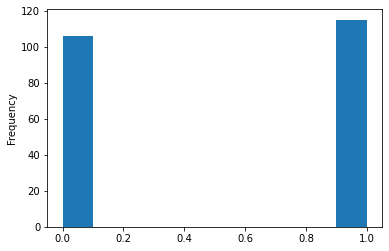

In [10]:
Y.plot.hist()

In [11]:
# visualize the relationship between the features and the response using scatterplots
# sns.pairplot(data, x_vars=["H","β","γ","C","Φ","ru"], y_vars="Stability", size=7, aspect=0.7)

In [12]:
# ax = sns.violinplot(x="data", y="", data=tips)

<AxesSubplot:ylabel='H'>

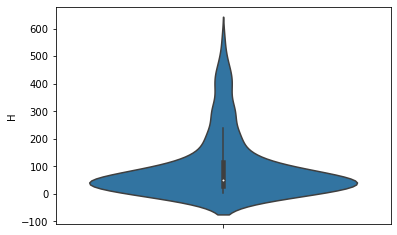

In [14]:
# tips = sns.load_dataset("tips")
sns.violinplot(y=data["H"])


<AxesSubplot:ylabel='β'>

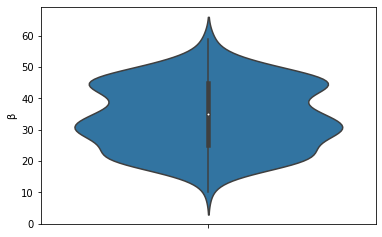

In [15]:
sns.violinplot(y=data["β"])

<AxesSubplot:ylabel='γ'>

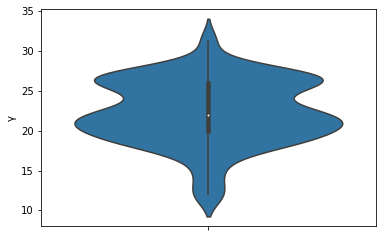

In [16]:
sns.violinplot(y=data["γ"])

<AxesSubplot:ylabel='C'>

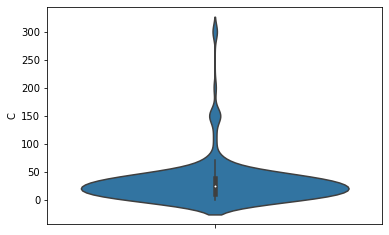

In [17]:
sns.violinplot(y=data["C"])

<AxesSubplot:ylabel='Φ'>

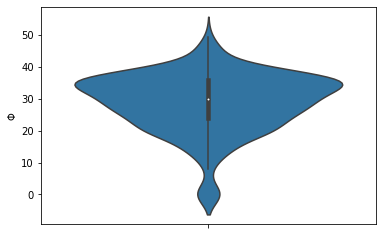

In [18]:
sns.violinplot(y=data["Φ"])

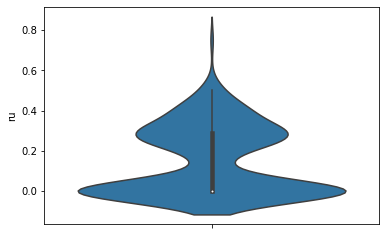

In [19]:
ax3 = sns.violinplot(y=data["ru"])

# HeatMap

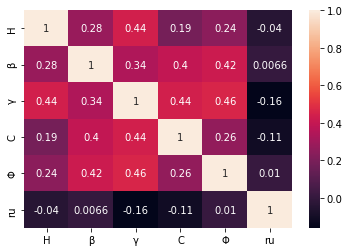

In [13]:
corrMatrix = X.corr()
heat_map=sn.heatmap(corrMatrix, annot=True)

In [14]:
heat_map

<AxesSubplot:>

In [15]:
X_temp=X

In [16]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (165, 6)
Number transactions y_train dataset:  (165,)
Number transactions X_test dataset:  (56, 6)
Number transactions y_test dataset:  (56,)


# Logistic Regression

accuracy:   0.750


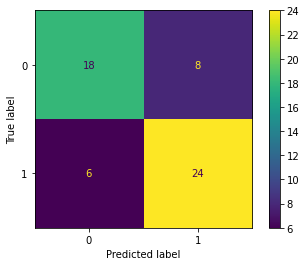

In [18]:

lr1 = LogisticRegression(penalty = 'l2',C= 0.1) 

# train the model on train set 
lr1.fit(X_train, y_train) 

pred=lr1.predict(X_test)

# predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
metrics.plot_confusion_matrix(lr1, X_test,y_test)

In [20]:
# y_test.to_numpy()
lr_probs = lr1.predict(X_test)
lr_probs

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

No Skill: ROC AUC=0.500
Logistic: AUC=0.829


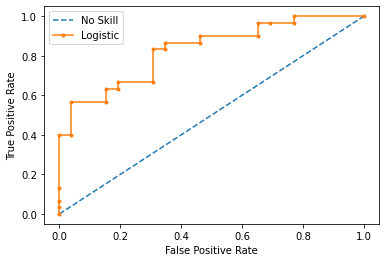

<Figure size 432x288 with 0 Axes>

In [22]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
pyplot.savefig('LR.png')

accuracy:   0.679
accuracy:   0.714
accuracy:   0.750
accuracy:   0.732
accuracy:   0.732
accuracy:   0.732


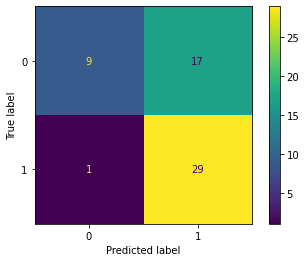

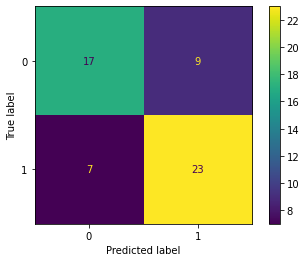

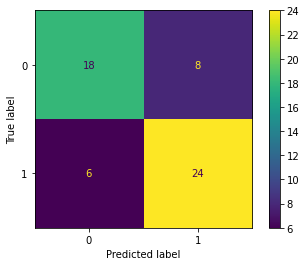

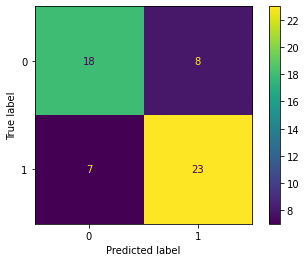

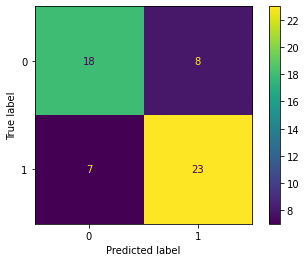

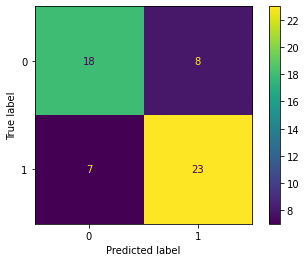

In [23]:
C_param_range = [0.001,0.01,0.1,1,10,100]

# sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
# sepal_acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    lr.fit(X_train,y_train)
    
    pred=lr.predict(X_test)
    # predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    metrics.plot_confusion_matrix(lr, X_test,y_test)
    

# SVC

In [24]:
from sklearn.svm import SVC
cost= {1, 2, 4, 8, 16, 32}
sigma= {0.0025, 0.005, 0.01, 0.015, 0.02, 0.025, 0.25, 1}

for c in cost:
#     for s in sigma:
    svc=SVC(C = c)
    svc.fit(X_train,y_train)
    pred=svc.predict(X_test)

    score = metrics.accuracy_score(y_test, pred)
    print(score)
    print(c)
#         print(s)

# svc = SVC(kernel='linear')
# svc.fit(X_train, y_train)

# svc.fit(X_train, y_train) 

# pred=svc.predict(X_test)

# predict(X_test)
# score = metrics.accuracy_score(y_test, pred)
# print("accuracy:   %0.3f" % score)
# metrics.plot_confusion_matrix(svc, X_test,y_test)

0.7857142857142857
32
0.7678571428571429
1
0.7321428571428571
2
0.75
4
0.7678571428571429
8
0.75
16


accuracy:   0.768


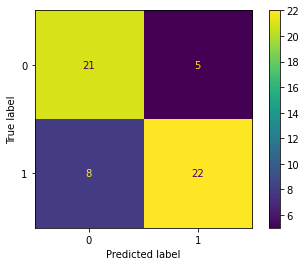

In [25]:
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)

pred=svc.predict(X_test)

pred=svc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
metrics.plot_confusion_matrix(svc, X_test,y_test)

SVC: AUC=0.852


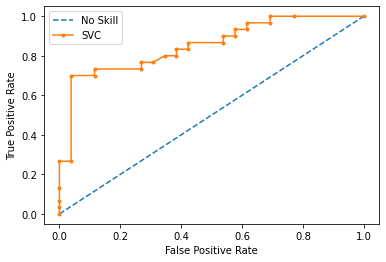

In [34]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = SVC(kernel = 'linear',probability=True)
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC: AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# GBC

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

GBC : AUC=0.919


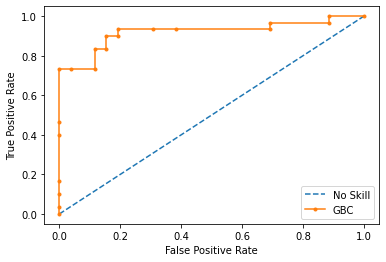

In [35]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model  = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GBC : AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='GBC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

accuracy:   0.821


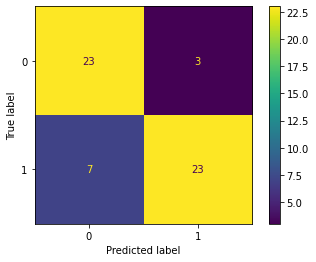

In [97]:
pred=clf.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
metrics.plot_confusion_matrix(clf, X_test,y_test)

# Random Forest

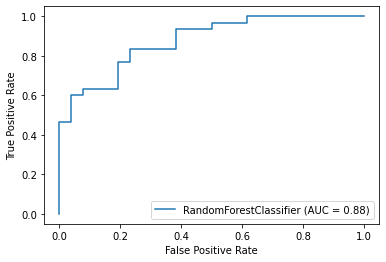

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
metrics.plot_roc_curve(rf,X_test,y_test)

Random Forest: AUC=0.876


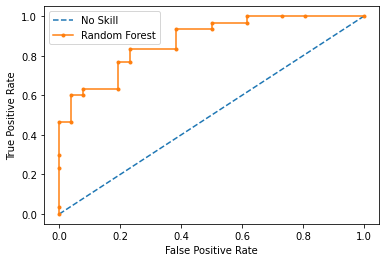

In [36]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model  = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# ANN

In [101]:
classifier = Sequential()


In [102]:
#add input layer and first hidden layer
classifier.add(Dense(6, activation = 'relu', input_dim = 6))
classifier.add(Dropout(rate=0.2))
#add 2nd hidden layer
classifier.add(Dense( 6, activation = "relu"))
classifier.add(Dropout(rate=0.2))

In [103]:
classifier.add(Dense(1, activation = "sigmoid"))

In [104]:
classifier.compile(optimizer = "Adam", loss ="binary_crossentropy", metrics = ["accuracy"])

In [105]:
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
17/17 [==============================] - 0s 762us/step - loss: 0.7046 - accuracy: 0.4828
Epoch 2/100
17/17 [==============================] - 0s 526us/step - loss: 0.7117 - accuracy: 0.4238
Epoch 3/100
17/17 [==============================] - 0s 671us/step - loss: 0.6871 - accuracy: 0.4593
Epoch 4/100
17/17 [==============================] - 0s 740us/step - loss: 0.6838 - accuracy: 0.5871
Epoch 5/100
17/17 [==============================] - 0s 826us/step - loss: 0.6977 - accuracy: 0.5756
Epoch 6/100
17/17 [==============================] - 0s 761us/step - loss: 0.6772 - accuracy: 0.5558
Epoch 7/100
17/17 [==============================] - 0s 738us/step - loss: 0.6737 - accuracy: 0.5962
Epoch 8/100
17/17 [==============================] - 0s 744us/step - loss: 0.6801 - accuracy: 0.5887
Epoch 9/100
17/17 [==============================] - 0s 688us/step - loss: 0.6706 - accuracy: 0.5850
Epoch 10/100
17/17 [==============================] - 0s 681us/step - loss: 0.6919 - accura

accuracy:   0.750


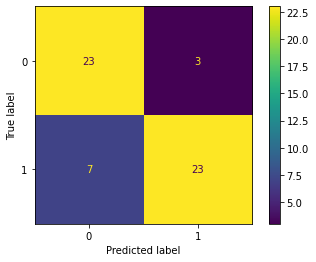

In [106]:
pred=classifier.predict(X_test)
pred=pred>0.5
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
metrics.plot_confusion_matrix(clf, X_test,y_test)

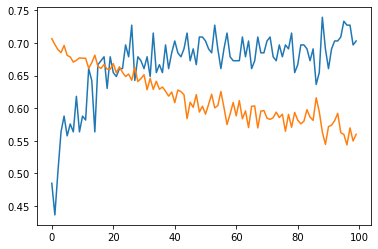

In [107]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# summarize history for loss
plt.plot(history.history['loss'])